# 03 - Visualization Methods

Complete guide to all plotting functions in trend_classifier.

## What You'll Learn
- `plot_segments()` - Overview of all segments
- `plot_segment()` - Highlight specific segments
- `plot_segment_with_trendlines_no_context()` - Detailed trendline view
- `plot_detrended_signal()` - Residuals visualization
- Customizing figure sizes

## Setup

In [1]:
import yfinance as yf

from trend_classifier import Segmenter

# Download data
df = yf.download("AAPL", start="2018-09-15", end="2022-09-05", interval="1d", progress=False)

# Create and calculate segments
seg = Segmenter(df=df, column="Close", n=20)
seg.calculate_segments()

print(f"Working with {len(seg.segments)} segments")

Working with 49 segments


## 1. `plot_segments()` - Full Overview

Shows the entire time series with all detected segments and their trend lines.

**Color coding:**
- 🟢 Green: Consistent uptrend (all window slopes positive)
- 🔴 Red: Consistent downtrend (all window slopes negative)
- 🟤 Brown/Mixed: Inconsistent trend direction

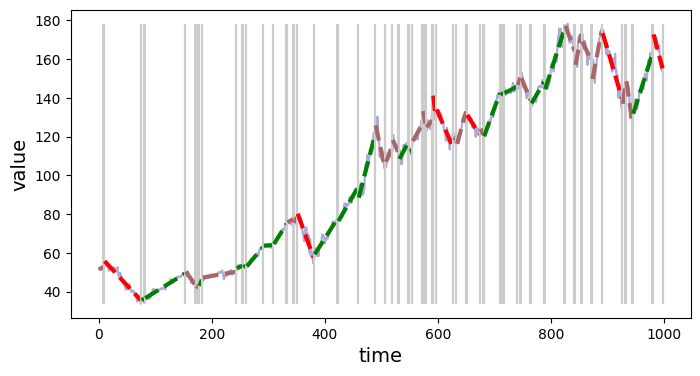

In [2]:
# Default size
seg.plot_segments()

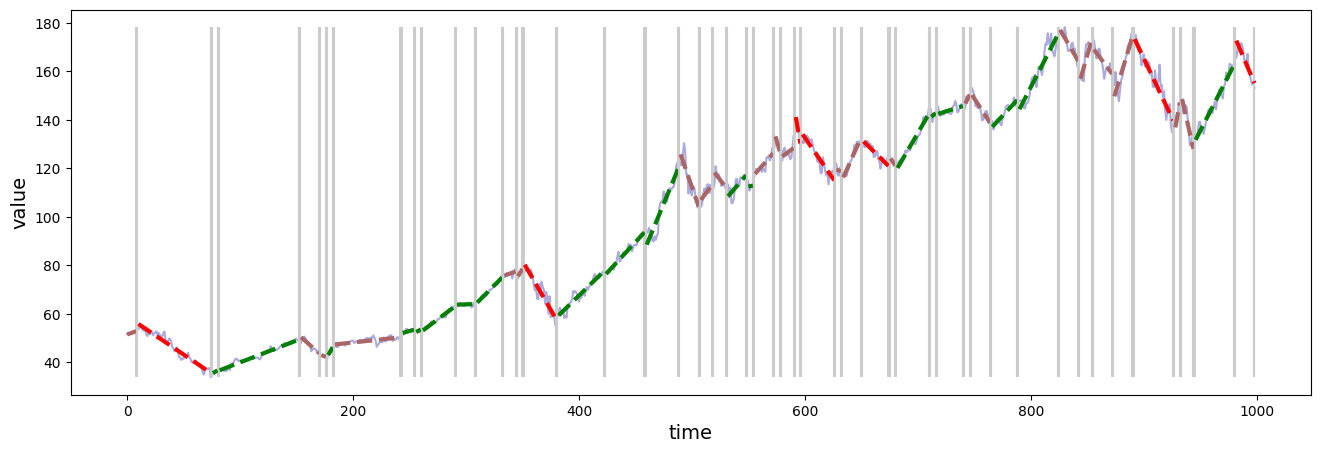

In [3]:
# Custom figure size - wider for presentations
seg.plot_segments(fig_size=(16, 5))

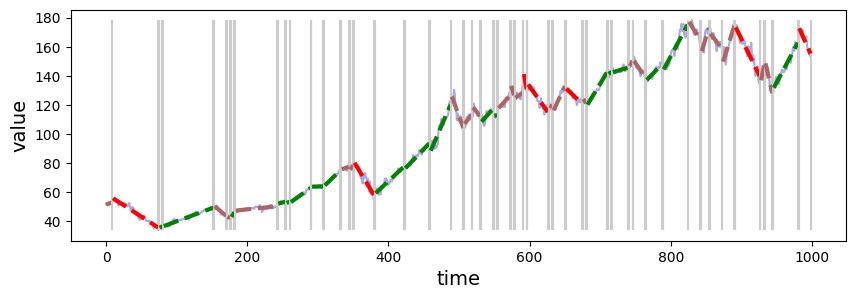

In [4]:
# Compact view
seg.plot_segments(fig_size=(10, 3))

## 2. `plot_segment()` - Highlight Specific Segments

Highlights one or more segments against the full time series background.
Useful for examining segments of interest.

### Single Segment

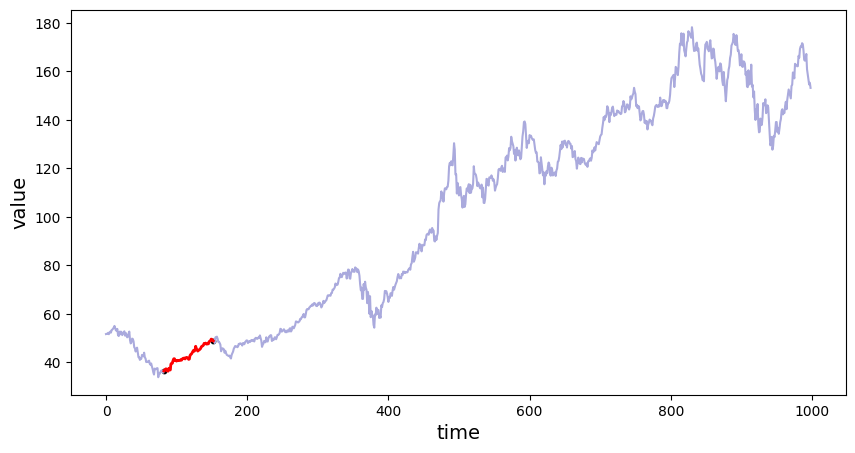

In [5]:
# Highlight segment 3
seg.plot_segment(idx=3)

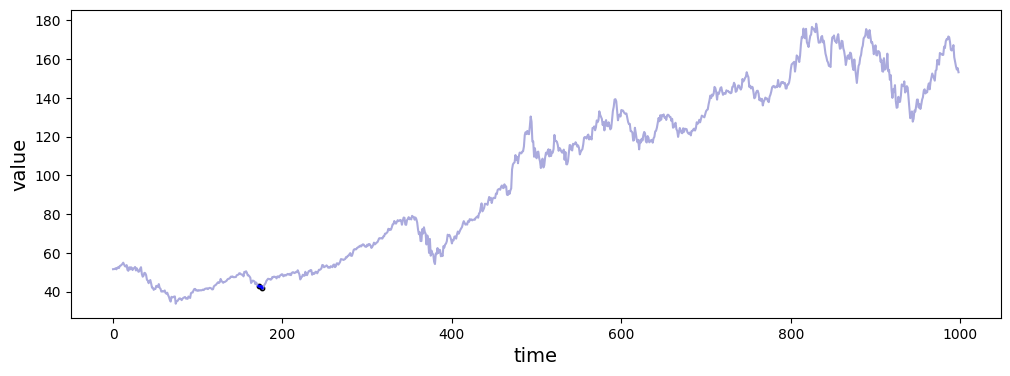

In [6]:
# With custom color and size
seg.plot_segment(idx=5, col="blue", fig_size=(12, 4))

### Multiple Segments

Pass a list of indices to highlight multiple segments at once.

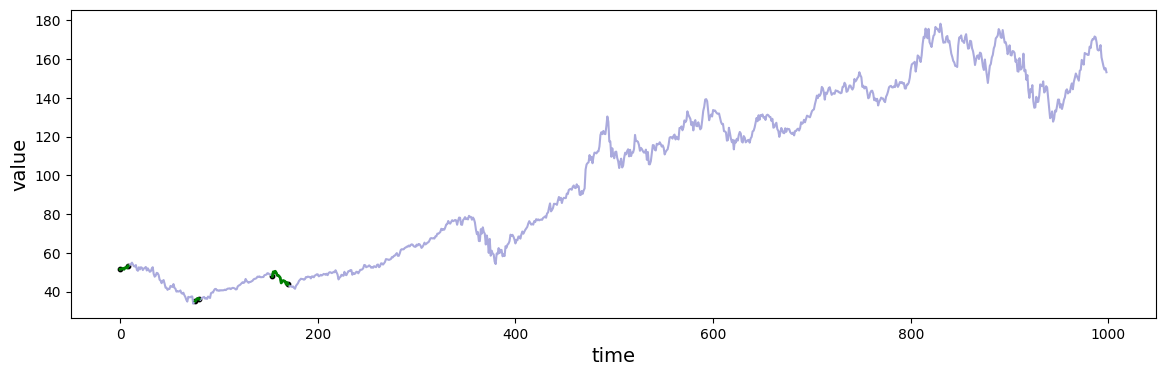

In [7]:
# Highlight segments 0, 2, and 4
seg.plot_segment(idx=[0, 2, 4], col="green", fig_size=(14, 4))

Uptrend segments: [0, 2, 3, 6, 9, 10, 12, 14, 16, 17, 18, 20, 22, 23, 24, 26, 30, 33, 34, 35, 36, 38, 39, 41, 43, 45, 47]


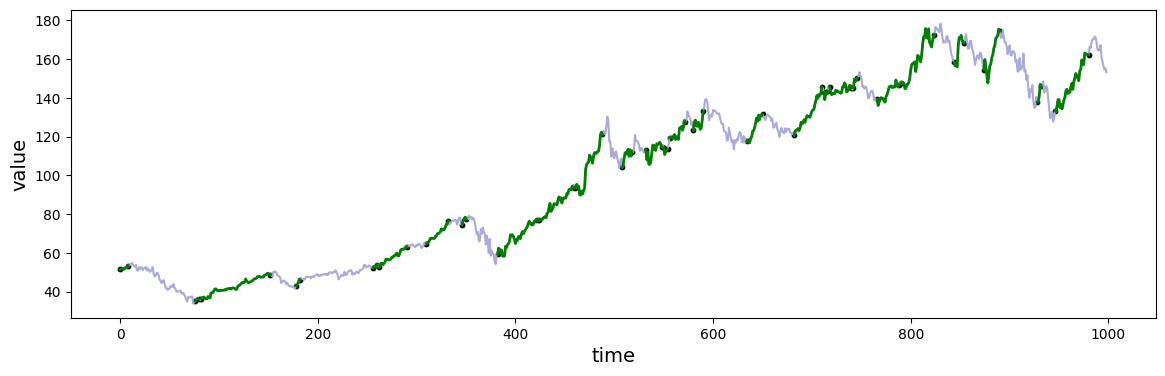

In [8]:
# Highlight all uptrend segments
uptrend_indices = [i for i, s in enumerate(seg.segments) if s.slope > 0.1]
print(f"Uptrend segments: {uptrend_indices}")
seg.plot_segment(idx=uptrend_indices, col="green", fig_size=(14, 4))

Downtrend segments: [1, 4, 5, 15, 19, 21, 25, 27, 28, 29, 31, 32, 37, 40, 42, 44, 46, 48]


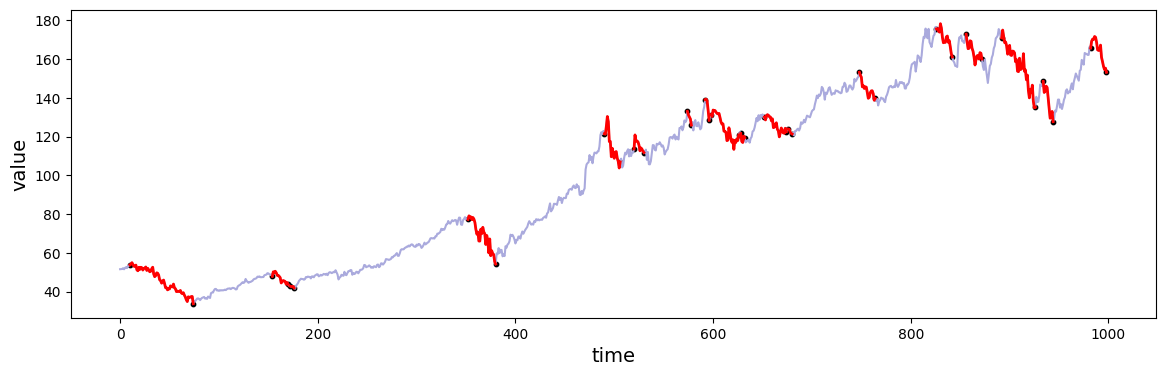

In [9]:
# Highlight all downtrend segments
downtrend_indices = [i for i, s in enumerate(seg.segments) if s.slope < -0.1]
print(f"Downtrend segments: {downtrend_indices}")
seg.plot_segment(idx=downtrend_indices, col="red", fig_size=(14, 4))

## 3. `plot_segment_with_trendlines_no_context()` - Detailed View

Shows a single segment zoomed in, with all individual window trendlines visible.
This helps understand how the segment was constructed from overlapping windows.

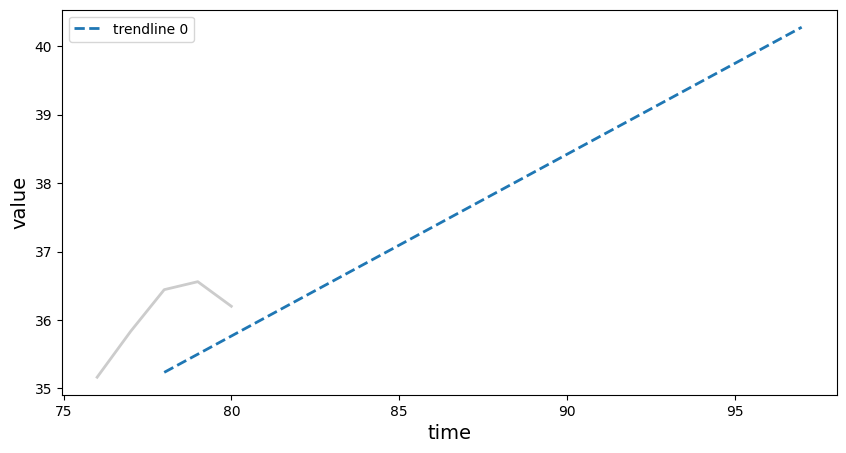

In [10]:
# View segment 2 with its constituent trendlines
seg.plot_segment_with_trendlines_no_context(idx=2)

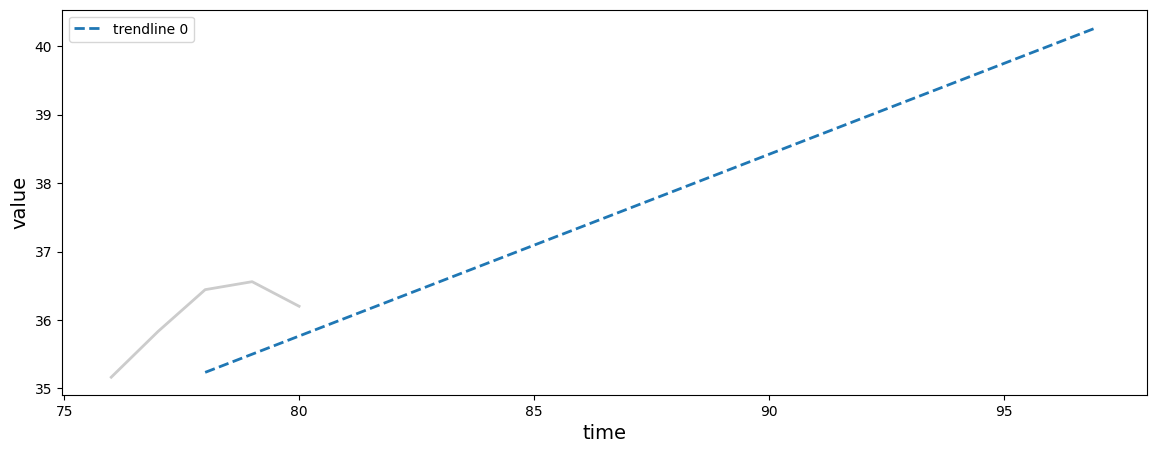

In [11]:
# Larger view
seg.plot_segment_with_trendlines_no_context(idx=2, fig_size=(14, 5))

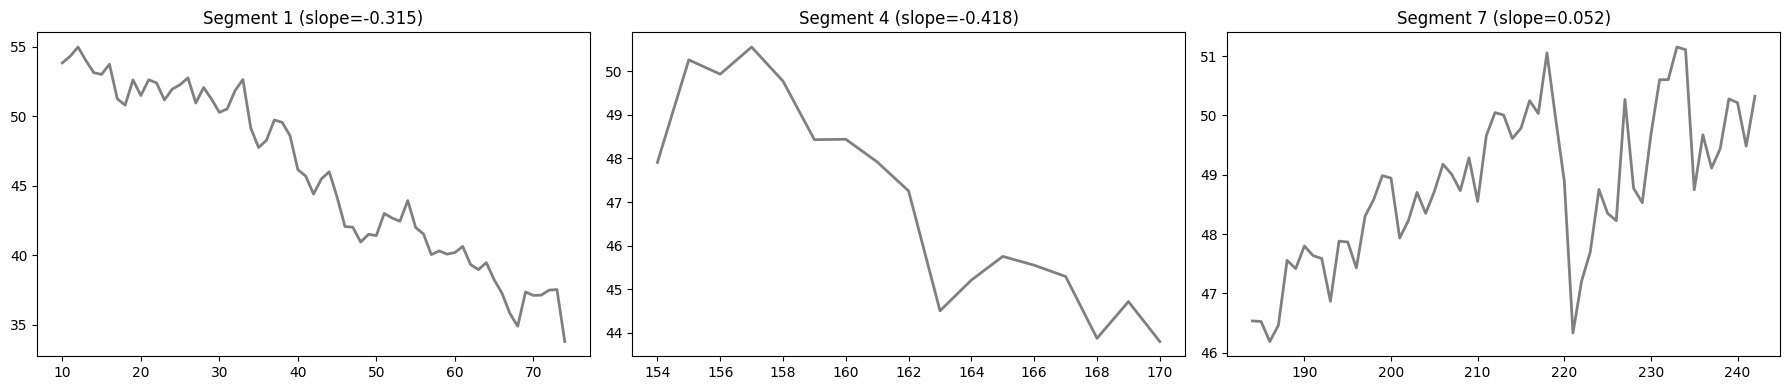

In [12]:
# Compare different segments
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for ax_idx, seg_idx in enumerate([1, 4, 7]):
    plt.sca(axes[ax_idx])
    # Note: This method creates its own figure, so we'll use manual plotting
    segment = seg.segments[seg_idx]
    x_seg = seg.x[segment.start:segment.stop]
    y_seg = seg.y[segment.start:segment.stop]
    axes[ax_idx].plot(x_seg, y_seg, 'gray', linewidth=2)
    axes[ax_idx].set_title(f"Segment {seg_idx} (slope={segment.slope:.3f})")
plt.tight_layout()
plt.show()

## 4. `plot_detrended_signal()` - Residuals

Shows the signal after removing the linear trend from each segment.
This visualizes the "noise" or volatility within each trend.

**Interpretation:**
- Values close to 0 = price following the trend closely
- Large deviations = price deviating from the trend

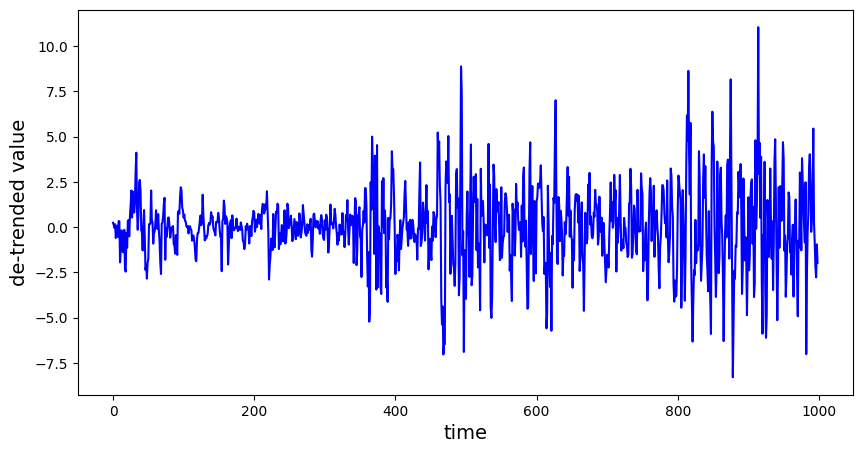

In [13]:
# Plot detrended signal
seg.plot_detrended_signal()

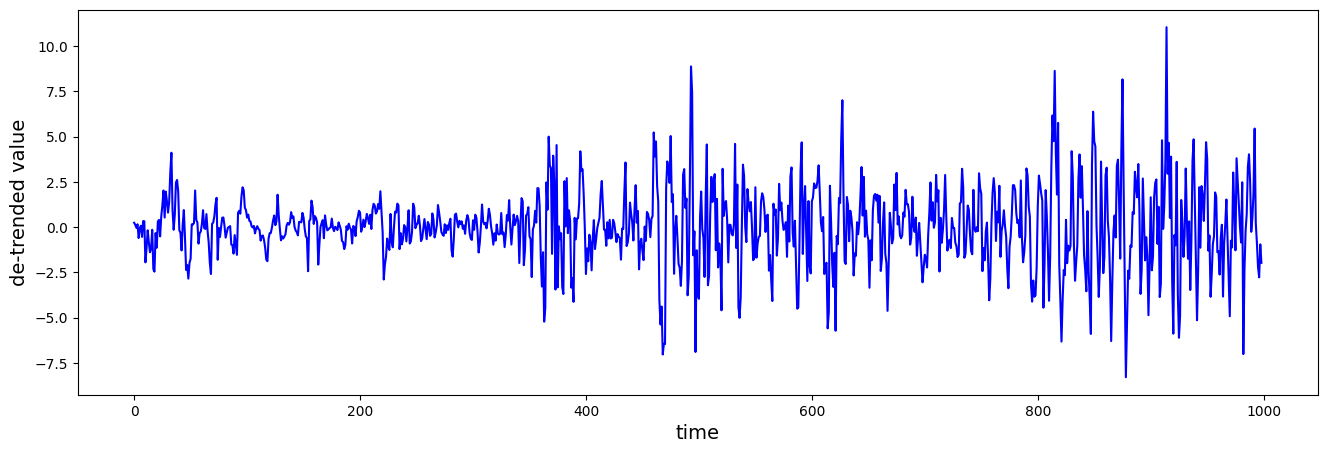

In [14]:
# Larger view to see detail
seg.plot_detrended_signal(fig_size=(16, 5))

## 5. Custom Visualizations

You can also create custom plots using matplotlib and segment data.

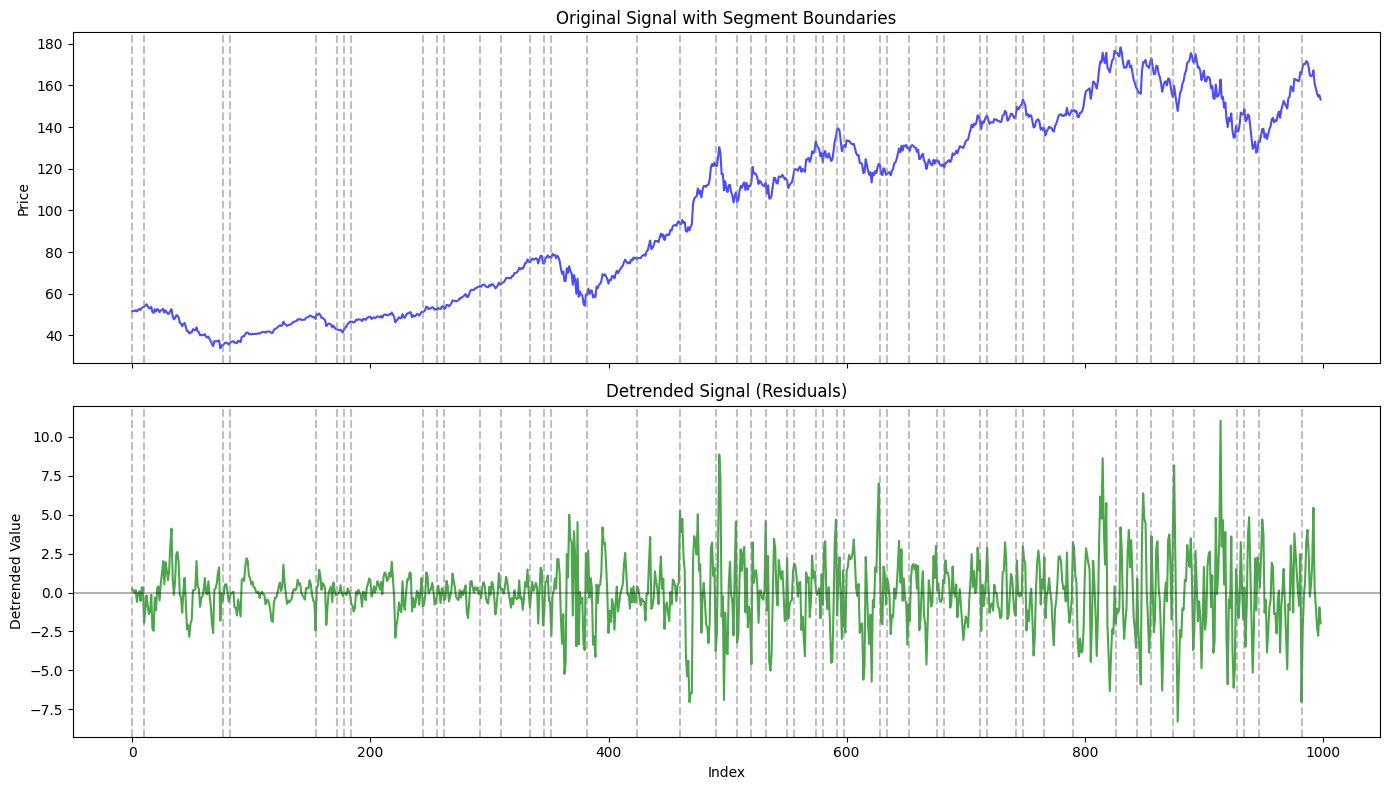

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Create a subplot with original and detrended signals
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Original signal with segment boundaries
axes[0].plot(seg.x, seg.y, 'b-', alpha=0.7)
for segment in seg.segments:
    axes[0].axvline(x=segment.start, color='gray', linestyle='--', alpha=0.5)
axes[0].set_ylabel("Price")
axes[0].set_title("Original Signal with Segment Boundaries")

# Detrended signal
axes[1].plot(seg.x, seg.y_de_trended, 'g-', alpha=0.7)
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
for segment in seg.segments:
    axes[1].axvline(x=segment.start, color='gray', linestyle='--', alpha=0.5)
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Detrended Value")
axes[1].set_title("Detrended Signal (Residuals)")

plt.tight_layout()
plt.show()

## Figure Size Reference

| Use Case | Recommended Size |
|----------|------------------|
| Notebook inline | `(10, 5)` default |
| Wide presentation | `(16, 5)` or `(18, 5)` |
| Compact/thumbnail | `(8, 3)` |
| Detailed analysis | `(14, 6)` |
| Side-by-side comparison | `(7, 4)` per subplot |

## Next Steps

- **04_configuration.py** - Tune parameters to improve segmentation
- **05_classification.py** - Classify segments by trend direction